# Part I - Loan Data from Prosper
## by Myra Lugwiri

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
> The Data was made available by Udacity and can be downloaded from [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.0)

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Loading the loan dataset
loan_data = pd.read_csv("prosperLoanData.csv")

In [3]:
# Overview of the shape of the data
loan_data.shape

(113937, 81)

In [4]:
# The datatypes for each column in the dataset
loan_data.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

>We have some columns such as the loanOriginationDate with the object data type when it should be date datatype

In [5]:
# Identify if we have missing values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

>From the info method we have some columns with a lot of missing values hence these columns may not provide detailed insights

In [7]:
# Descriptive statistics for numerical variables
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


>loanStatus, EmploymentStatus, columns are categorical data


#### Modifications on the data 

Due a certain issues raised above such as a lot of missing values and incorrect data types the following modifications will be made in order to explore the data and arrive at correct insights

In [8]:
# Making a copy of the data
cp_loan_data = loan_data.copy()

In [9]:
# Getting the value counts of the LoanStatus column 
values = cp_loan_data['LoanStatus'].value_counts()
print(values)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


In [10]:
# finding the value counts of EmploymentStatus 
cp_loan_data['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

The LoanStatus and EmploymentStatus variables are categorical variables hence below are going to keep them in a categorical datatype

In [11]:
# making loanStatus, Occupation, EmploymentStatus, IsBorrowerHomeowner into categorical types
nominal_var_data = {'LoanStatus': ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)',
                                  'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)',
                                  'Cancelled'], 
                   'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time',
                                       'Not employed', 'Retired']}
# Loop through the dictionary above to convert the variables to categorical
for var in nominal_var_data:
    ordered_data = pd.api.types.CategoricalDtype(categories=nominal_var_data[var])
    cp_loan_data[var] = cp_loan_data[var].astype(ordered_data)

In [12]:
cp_loan_data['LoanStatus'].dtypes

CategoricalDtype(categories=['Current', 'Completed', 'Chargedoff', 'Defaulted',
                  'Past Due (1-15 days)', 'Past Due (31-60 days)',
                  'Past Due (61-90 days)', 'Past Due (91-120 days)',
                  'Past Due (16-30 days)', 'FinalPaymentInProgress',
                  'Past Due (>120 days)', 'Cancelled'],
                 ordered=False)

>Due to the large number of columns, certain columns will not play a role in the interest I want to explore with the dataset
hence will remove the given columns that have a lot of missing information and will not be used in the analysis.

In [13]:
# Dropping the columns that will not be used in the current analysis
cp_loan_data.drop('CreditGrade', inplace=True, axis=1)
cp_loan_data.drop('ClosedDate', inplace=True, axis=1)
cp_loan_data.drop('EstimatedEffectiveYield', inplace=True, axis=1)
cp_loan_data.drop('EstimatedLoss', inplace=True, axis=1)
cp_loan_data.drop('EstimatedReturn', inplace=True, axis=1)
cp_loan_data.drop('ProsperRating (numeric)', inplace=True, axis=1)
cp_loan_data.drop('ProsperRating (Alpha)', inplace=True, axis=1)
cp_loan_data.drop('ProsperScore', inplace=True, axis=1)
cp_loan_data.drop('ListingCategory (numeric)', inplace=True, axis=1)
cp_loan_data.drop('BorrowerState', inplace=True, axis=1)
cp_loan_data.drop('GroupKey', inplace=True, axis=1)
cp_loan_data.drop('DateCreditPulled', inplace=True, axis=1)
cp_loan_data.drop('CurrentCreditLines', inplace=True, axis=1)
cp_loan_data.drop('OpenCreditLines', inplace=True, axis=1)
cp_loan_data.drop('OpenRevolvingAccounts', inplace=True, axis=1)
cp_loan_data.drop('OpenRevolvingMonthlyPayment', inplace=True, axis=1)
cp_loan_data.drop('InquiriesLast6Months', inplace=True, axis=1)
cp_loan_data.drop('TotalInquiries', inplace=True, axis=1)
cp_loan_data.drop('CurrentDelinquencies', inplace=True, axis=1)
cp_loan_data.drop('AmountDelinquent', inplace=True, axis=1)
cp_loan_data.drop('PublicRecordsLast10Years', inplace=True, axis=1)
cp_loan_data.drop('PublicRecordsLast12Months', inplace=True, axis=1)
cp_loan_data.drop('BankcardUtilization', inplace=True, axis=1)
cp_loan_data.drop('TotalTrades', inplace=True, axis=1)
cp_loan_data.drop('TradesNeverDelinquent (percentage)', inplace=True, axis=1)
cp_loan_data.drop('TradesOpenedLast6Months', inplace=True, axis=1)
cp_loan_data.drop('DebtToIncomeRatio', inplace=True, axis=1)
cp_loan_data.drop('IncomeRange', inplace=True, axis=1)
cp_loan_data.drop('IncomeVerifiable', inplace=True, axis=1)
cp_loan_data.drop('LoanKey', inplace=True, axis=1)
cp_loan_data.drop('TotalProsperLoans', inplace=True, axis=1)
cp_loan_data.drop('TotalProsperPaymentsBilled', inplace=True, axis=1)
cp_loan_data.drop('OnTimeProsperPayments', inplace=True, axis=1)
cp_loan_data.drop('ProsperPaymentsLessThanOneMonthLate', inplace=True, axis=1)
cp_loan_data.drop('ProsperPaymentsOneMonthPlusLate', inplace=True, axis=1)
cp_loan_data.drop('ProsperPrincipalBorrowed', inplace=True, axis=1)
cp_loan_data.drop('ProsperPrincipalOutstanding', inplace=True, axis=1)
cp_loan_data.drop('ScorexChangeAtTimeOfListing', inplace=True, axis=1)
cp_loan_data.drop('LoanCurrentDaysDelinquent', inplace=True, axis=1)
cp_loan_data.drop('LoanFirstDefaultedCycleNumber', inplace=True, axis=1)
cp_loan_data.drop('LoanMonthsSinceOrigination', inplace=True, axis=1)
cp_loan_data.drop('LoanOriginationQuarter', inplace=True, axis=1)
cp_loan_data.drop('LP_CustomerPayments', inplace=True, axis=1)
cp_loan_data.drop('LP_CustomerPrincipalPayments', inplace=True, axis=1)
cp_loan_data.drop('LP_InterestandFees', inplace=True, axis=1)
cp_loan_data.drop('LP_ServiceFees', inplace=True, axis=1)
cp_loan_data.drop('LP_CollectionFees', inplace=True, axis=1)
cp_loan_data.drop('LP_GrossPrincipalLoss', inplace=True, axis=1)
cp_loan_data.drop('LP_NetPrincipalLoss', inplace=True, axis=1)
cp_loan_data.drop('LP_NonPrincipalRecoverypayments', inplace=True, axis=1)
cp_loan_data.drop('PercentFunded', inplace=True, axis=1)

> The columns above were dropped mainly because I did not intend to use them to answer the questions I have on the dataset due to the questions being specific on certain columns and majority of the columns had a lot of missing values.

In [14]:
# Changing the datatype of the ListingCreationDate column to datetime from object
cp_loan_data['ListingCreationDate']= cp_loan_data['ListingCreationDate'].astype('datetime64[ns]')

In [15]:
# Changing the datatype of the LoanOriginationDate column to datetime from object
cp_loan_data['LoanOriginationDate'] = cp_loan_data['LoanOriginationDate'].astype('datetime64[ns]')

In [16]:
# Dropping more columns that will not be used in the analysis
cp_loan_data.drop('ListingKey', inplace=True, axis=1)
cp_loan_data.drop('MemberKey', inplace=True, axis=1)

In [17]:
# Dropping all the missing values from the dataset
cp_loan_data.dropna(inplace=True)

In [18]:
# Getting an overview of the current data
cp_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104963 entries, 0 to 113936
Data columns (total 28 columns):
ListingNumber                  104963 non-null int64
ListingCreationDate            104963 non-null datetime64[ns]
Term                           104963 non-null int64
LoanStatus                     104963 non-null category
BorrowerAPR                    104963 non-null float64
BorrowerRate                   104963 non-null float64
LenderYield                    104963 non-null float64
Occupation                     104963 non-null object
EmploymentStatus               104963 non-null category
EmploymentStatusDuration       104963 non-null float64
IsBorrowerHomeowner            104963 non-null bool
CurrentlyInGroup               104963 non-null bool
CreditScoreRangeLower          104963 non-null float64
CreditScoreRangeUpper          104963 non-null float64
FirstRecordedCreditLine        104963 non-null object
TotalCreditLinespast7years     104963 non-null float64
Delinquencie

In [19]:
cp_loan_data

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,Occupation,EmploymentStatus,EmploymentStatusDuration,...,AvailableBankcardCredit,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,Other,Self-employed,2.0,...,1500.0,3083.333333,19141,9425,2007-09-12,330.43,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,Professional,Employed,44.0,...,10266.0,6125.000000,134815,10000,2014-03-03,318.93,0,0,0.0,1
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,Skilled Labor,Employed,113.0,...,30754.0,2875.000000,77296,10000,2012-11-01,321.45,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,Executive,Employed,44.0,...,695.0,9583.333333,102670,15000,2013-09-20,563.97,0,0,0.0,20
5,1074836,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,Professional,Employed,82.0,...,86509.0,8333.333333,123257,15000,2013-12-24,342.37,0,0,0.0,1
6,750899,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,Sales - Retail,Employed,172.0,...,1929.0,2083.333333,88353,3000,2013-04-18,122.67,0,0,0.0,1
7,768193,2013-05-05 06:49:27.493,36,Current,0.23939,0.2019,0.1919,Laborer,Employed,103.0,...,2181.0,3355.750000,90051,10000,2013-05-13,372.60,0,0,0.0,1
8,1023355,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,Food Service,Employed,269.0,...,77696.0,3333.333333,121268,10000,2013-12-12,305.54,0,0,0.0,1
9,1023355,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,Food Service,Employed,269.0,...,77696.0,3333.333333,121268,10000,2013-12-12,305.54,0,0,0.0,1
10,587746,2012-05-10 07:04:01.577,60,Current,0.27462,0.2489,0.2389,Fireman,Employed,300.0,...,363.0,7500.000000,65946,13500,2012-05-17,395.37,0,0,0.0,19


### What is the structure of your dataset?

> We have 104,963 loan listings in the dataset with 28features after the removal of some. Most of the variables are numeric in nature with 2 main categorical variables

### What is/are the main feature(s) of interest in your dataset?

> I am interested in assessing how various features affect the loan amount and Loanstatus 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I want to explore how loans affect the monthlyLoanPayment 

> I expect that majority of individuals who are home owners will have a completed loanStatus or current

> I expect that the higher the LenderYield and StatedMonthlyIncome the higher the loan amount

> I expect that larger loans have a larger Term so that they can spread the payment over time

> I want to explore how Loan Original Amount, Term, BorrowerAPR, BorrowerRate, EmploymentStatus affects the loan status

>I want to explore how isBorrowerhomeowner status affects the loan status

> I also expect that the following features a relationship exists between the features and the LoanStatus, EmploymentStatusDuration, Investors, BorrowerAPR, DelinquenciesLast7Years, Recommendations, RevolvingCreditBalance

## Univariate Exploration


#### What is the distribution of the variable LoanOriginalAmount?



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [20]:
cp_loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,TotalCreditLinespast7years,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.049630e+05,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,1.049630e+05,104963.000000,1.049630e+05,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000,104963.000000
mean,6.644777e+05,41.183770,0.220317,0.193133,0.183009,96.225508,691.342473,710.342473,27.038471,3.911512,1.763436e+04,11229.391528,5.696158e+03,73558.250812,8577.100635,279.318250,0.051942,0.025361,17.883023,82.123167
std,2.974650e+05,10.735652,0.081089,0.075361,0.075128,93.759901,56.609684,56.609684,13.590965,9.783064,3.305318e+04,19837.777841,7.649273e+03,35797.565742,6277.718484,192.504301,0.345686,0.241832,306.499053,105.145578
min,9.827900e+04,12.000000,0.006530,0.000000,-0.010000,0.000000,520.000000,539.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,7495.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.632760e+05,36.000000,0.157130,0.133400,0.123400,26.000000,660.000000,679.000000,17.000000,0.000000,3.087000e+03,880.000000,3.333333e+03,43376.500000,4000.000000,138.840000,0.000000,0.000000,0.000000,1.000000
50%,6.214560e+05,36.000000,0.210560,0.184000,0.173000,67.000000,680.000000,699.000000,25.000000,0.000000,8.557000e+03,4111.000000,4.780167e+03,72498.000000,7000.000000,229.500000,0.000000,0.000000,0.000000,45.000000
75%,9.060485e+05,36.000000,0.285740,0.251100,0.241100,137.000000,720.000000,739.000000,35.000000,3.000000,1.956050e+04,13229.000000,6.916667e+03,102841.500000,12000.000000,377.980000,0.000000,0.000000,0.000000,119.000000
max,1.255725e+06,60.000000,0.423950,0.360000,0.340000,755.000000,880.000000,899.000000,136.000000,99.000000,1.435667e+06,646285.000000,1.750003e+06,136486.000000,35000.000000,2251.510000,39.000000,33.000000,25000.000000,1189.000000


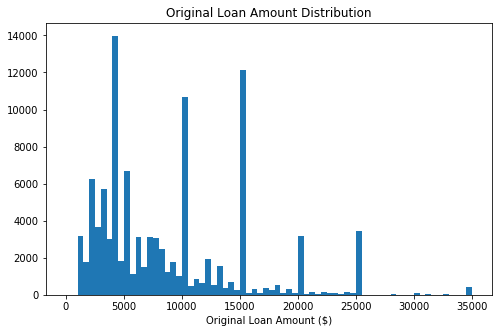

In [21]:
# Plotting a histogram
binsize = 500
bins = np.arange(0, cp_loan_data['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=cp_loan_data, x='LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount ($)')
plt.title('Original Loan Amount Distribution');

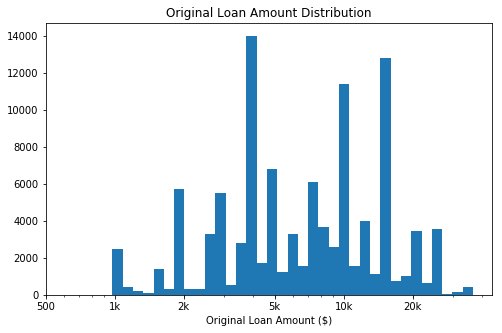

In [22]:
# We have a long tail in the data distribution, use of a log scale is utilised 
log_binsize = 0.045
bins = 10 ** np.arange(2.9, np.log10(cp_loan_data['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize = [8, 5])
plt.hist(data= cp_loan_data, x='LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Original Loan Amount ($)')
plt.title('Original Loan Amount Distribution');

Loan amount distribution has a long tail with most of the loans taken being of low amount in the first graph. When the data is plotted on a log scale we see 2 peaks the first one below 5k and second one past 10k and a little below 20k and before both these peaks we have a steep frequency jump. Instead of a smooth transition

#### Assessing the distribution of the MonthlyLoanPayment 

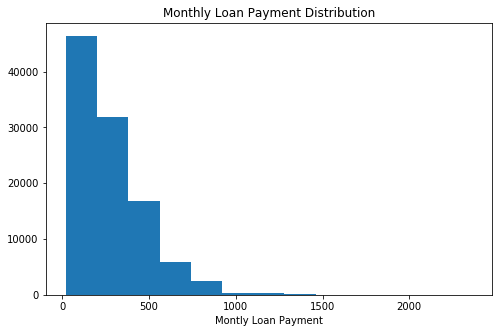

In [23]:
# Creating a histogram of the montlyLoanPayment
binsize = 180
bins = np.arange(20, cp_loan_data['MonthlyLoanPayment'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=cp_loan_data, x='MonthlyLoanPayment', bins= bins )
plt.xlabel('Montly Loan Payment')
plt.title('Monthly Loan Payment Distribution');

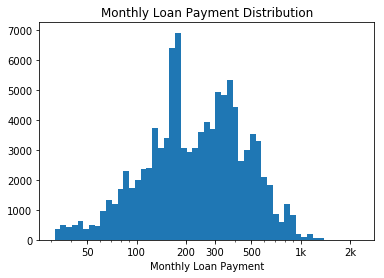

In [24]:
bin_size = 0.035
bins = 10 ** np.arange(1.5, np.log10(cp_loan_data['MonthlyLoanPayment'].max())+bin_size, bin_size)
plt.hist(data=cp_loan_data, x='MonthlyLoanPayment', bins=bins)
plt.xscale('log')
plt.xticks([50, 100, 200, 300, 500, 1e3, 2e3], [50, 100, 200, 300, 500, '1k', '2k'])
plt.xlabel('Monthly Loan Payment')
plt.title('Monthly Loan Payment Distribution');

When a log scale is used majority of the data lies between 100 and around 600 with the highest value just below 200

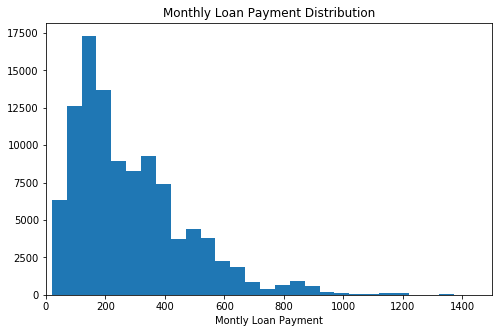

In [25]:
# The data may have an outlier to focus on the key area use axis limits 
binsize = 50
bins = np.arange(20, cp_loan_data['MonthlyLoanPayment'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=cp_loan_data, x='MonthlyLoanPayment', bins= bins )
plt.xlabel('Montly Loan Payment')
plt.xlim((0, 1500))
plt.title('Monthly Loan Payment Distribution');

The first plot indicates a long tail. The second plot with xlimits sheds more light on the distribution which is right skewed where we have a peak immediately below 200.The peak could be due to various factors such as the interest rate charged, the loan amount.

From the initial graph we can see we have high outliers. Will drill down to identify the outliers

In [26]:
high_outliers = ((cp_loan_data['MonthlyLoanPayment'] > 1500))
print(high_outliers.sum())
print(cp_loan_data.loc[high_outliers,:])

22
        ListingNumber     ListingCreationDate  Term              LoanStatus  \
8572           625497 2012-08-17 06:24:18.700    12               Completed   
14493          718172 2013-02-25 04:07:10.360    12  FinalPaymentInProgress   
17504          704191 2013-01-23 11:46:16.803    12               Completed   
19907          691747 2012-12-28 10:15:09.043    12               Completed   
20533          735327 2013-03-21 11:59:21.503    12                 Current   
29025          732140 2013-03-18 18:46:27.197    12                 Current   
32764          710281 2013-02-07 08:05:45.683    12               Completed   
49093          689878 2012-12-21 12:28:32.460    12               Completed   
49134          675300 2012-11-22 18:29:42.837    12               Completed   
55456          741854 2013-04-02 14:14:44.773    12                 Current   
58393          707601 2013-02-01 10:15:40.523    12               Completed   
58766          719595 2013-02-25 18:38:39.663    

When looking at the values raised as outliers they are valid points in that when the monthlyLoanPayment is calculated using the BorrowerRate, LenderYield and the originalLoanAmount they add up to the MonthlyLoanPayment highlighted as an outlier

#### Exploring the distribution of the loanStatus and EmploymentStatus categorical variables

In [27]:
status_count = cp_loan_data['LoanStatus'].value_counts()
print(status_count)

Current                   55268
Completed                 33517
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64


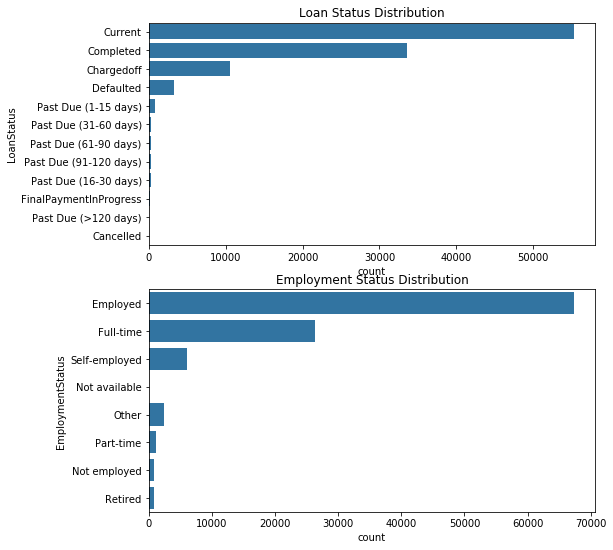

In [28]:
# Will plot the 2 variables together to view each variables distributions
fig, ax = plt.subplots(nrows=2,figsize= [8,9])
colors = sb.color_palette()[0]   
sb.countplot(data= cp_loan_data, y= 'LoanStatus', color=colors, ax=ax[0])
ax[0].set_title('Loan Status Distribution')
sb.countplot(data= cp_loan_data, y= 'EmploymentStatus', color=colors, ax=ax[1])
ax[1].set_title('Employment Status Distribution');


The majority of the loans taken are Current ones and the individuals taking these loans the majority are Employed when it comes to their EmploymentStatus. As expected the number of individuals whose employmentStatus is Partime, Not employmed and retired is small

#### Exploring the distribution of the loanTerm feature 

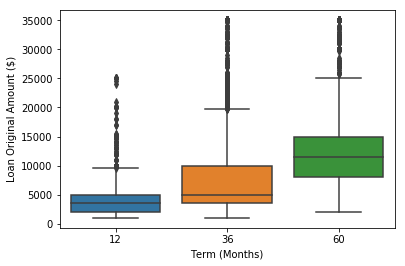

In [45]:
# Plotting a boxplot of the Term and LoanOriginalAmount
sb.boxplot(x='Term', y='LoanOriginalAmount', data=cp_loan_data)
plt.xlabel('Term (Months)')
plt.ylabel('Loan Original Amount ($)');

From the boxplot above we have 3 specific terms and the highest term is 60 consisting of mostly loans with high LoanOriginalAmount. The 36 Term is for loans with moderate LoanOriginalAmount from 5000 and the 12 term is for loans on the low side of the Loan Original Amount. And from my initial inference the longer term just below 60 is for larger loan amounts so that the repayment could be spread over time.

#### Exploring the distribution of Investors who invested in the different loans

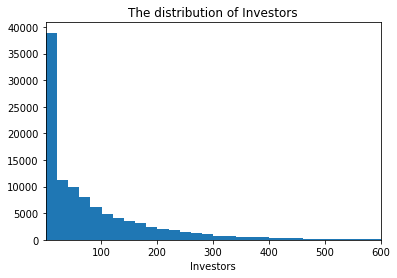

In [30]:
# Creating a histogram 
bin_size = 20
bins = np.arange(1, cp_loan_data['Investors'].max()+bin_size, bin_size)
plt.hist(data=cp_loan_data, x='Investors', bins=bins)
plt.xlabel('Investors')
plt.xlim((1, 600))
plt.title('The distribution of Investors');

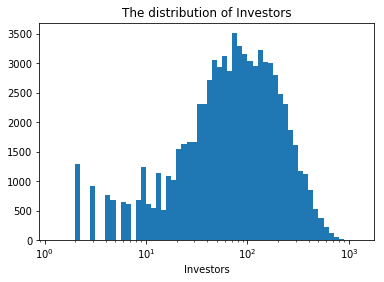

In [31]:
# Using a log scale due to the distribution above having a long tail
bin_size = 0.05
bins = 10 ** np.arange(0.1, np.log10(cp_loan_data['Investors'].max())+bin_size, bin_size)
plt.hist(data=cp_loan_data, x='Investors', bins=bins)
plt.xscale('log')
plt.xlabel('Investors')
plt.title('The distribution of Investors');

Investors has a long-tailed distribution but when plotted on a log scale the distribution is unimodal with the peak immediately below 100

#### Exploring the distribution of the BorrowerAPR and the BorrowerRate variables

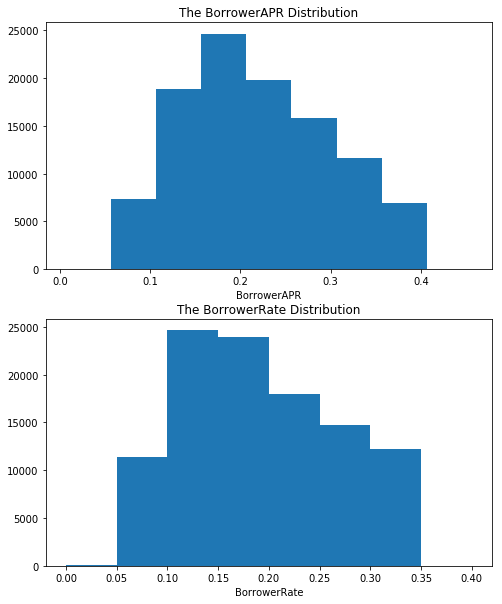

In [32]:
# Creating a histogram

fig, ax = plt.subplots(nrows=2, figsize = [8,10])

variables = ['BorrowerAPR', 'BorrowerRate']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(cp_loan_data[var]), max(cp_loan_data[var])+0.05, 0.05)
    ax[i].hist(data = cp_loan_data, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[0].set_title('The BorrowerAPR Distribution')
    ax[1].set_title('The BorrowerRate Distribution')


The BorrowerAPR peak is at 0.2 and the BorrowerAPR is unimodal with further investigation to see how the APR relates to the monthly loan payment.
While the peak for BorrowerRate is at 0.15 and is unimodal. For both variables as the BorrowerAPR and BorrowerRate Increases the count decreases.

#### Exploring the distribution of the statedmonthlyIncome

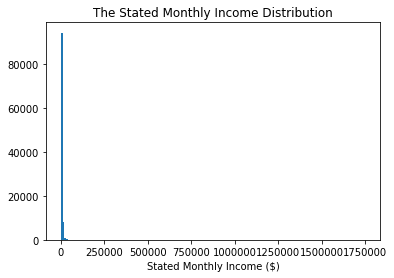

In [33]:
# Creating a histogram
bin_size = 10000
bins = np.arange(250, cp_loan_data['StatedMonthlyIncome'].max()+bin_size, bin_size)
plt.hist(data=cp_loan_data, x='StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.title('The Stated Monthly Income Distribution');

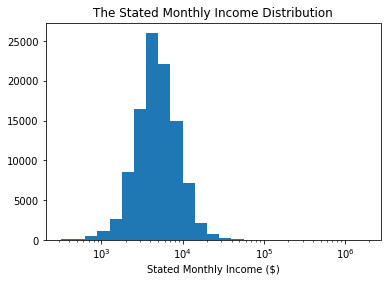

In [34]:
# Using a logscale for the histogram
bin_size = 0.15
bins = 10 ** np.arange(2.5, np.log10(cp_loan_data['StatedMonthlyIncome'].max())+bin_size, bin_size)
plt.hist(data=cp_loan_data, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xlabel('Stated Monthly Income ($)')
plt.title('The Stated Monthly Income Distribution');

In the first graph the StatedMonthlyIncome distribution has a long tail with majority of the data falling way below the 250000 mark when a log scale is used in the second distribution the distribution is unimodal and the peak is below the 10000 mark.

#### Exploring the distribution of the TotalCreditLinespast7years 

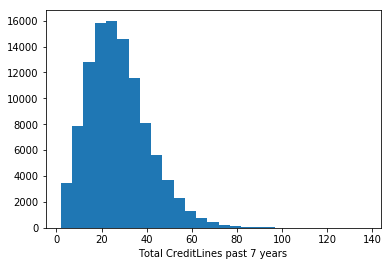

In [35]:
# Creating a histogram
bin_size = 5
bins = np.arange(2, cp_loan_data['TotalCreditLinespast7years'].max()+bin_size, bin_size)
plt.hist(data=cp_loan_data, x='TotalCreditLinespast7years', bins=bins)
plt.xlabel("Total CreditLines past 7 years");

The distribution is right skewed and unimodal. The peak is immediately above 20

#### Exploring the distribution of the isBorrowerHomeOwner variable

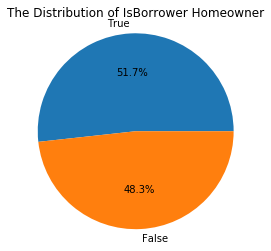

In [36]:
# Creating a Pie chart 
labels = 'True', 'False'
sorted_counts = cp_loan_data['IsBorrowerHomeowner'].value_counts()
data = sorted_counts.values
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.axis('square')
plt.title('The Distribution of IsBorrower Homeowner');

From the pie chart we can clearly see that majority of the individuals taking loans are homeowners which is represented by True

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The current LoanStatus has the highest number of individuals, where the number is above 50,000, it is followed by Completed then further off chargedoff. The data did not have any unsual points that would force the transformation of the data in order to see the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the MonthlyLoanPayment I discovered the data had 22 outliers, after taking a closer look at the data I discovered the values were valid and this was through calculating the MonthlyLoanPayment using the originalAmount and BorrowerRate. Hence I did not remove the values but used a logscale to investigate how majority of the data is distributed.

## Bivariate Exploration


#### Exploring pairwise correlations present between variables in the dataset

In [37]:
# Putting numerical and categorical features in a list 
numerical_features = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'Term', 'Investors', 'BorrowerAPR', 'BorrowerRate', 
                      'StatedMonthlyIncome', 'TotalCreditLinespast7years']
categorical_features = ['LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner']

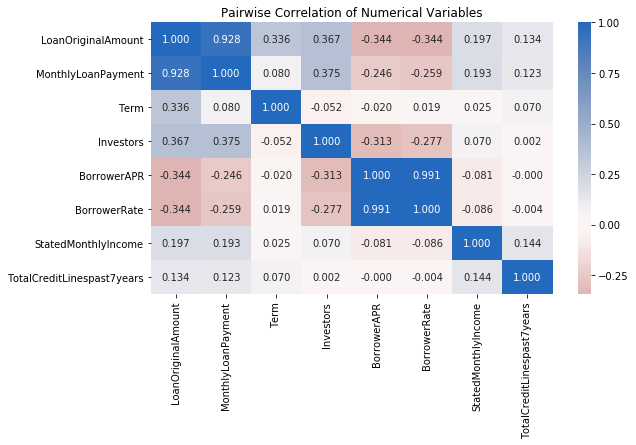

In [38]:
# Creating a correlation plot
plt.figure(figsize = [9, 5])
sb.heatmap(cp_loan_data[numerical_features].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0).set(title='Pairwise Correlation of Numerical Variables');

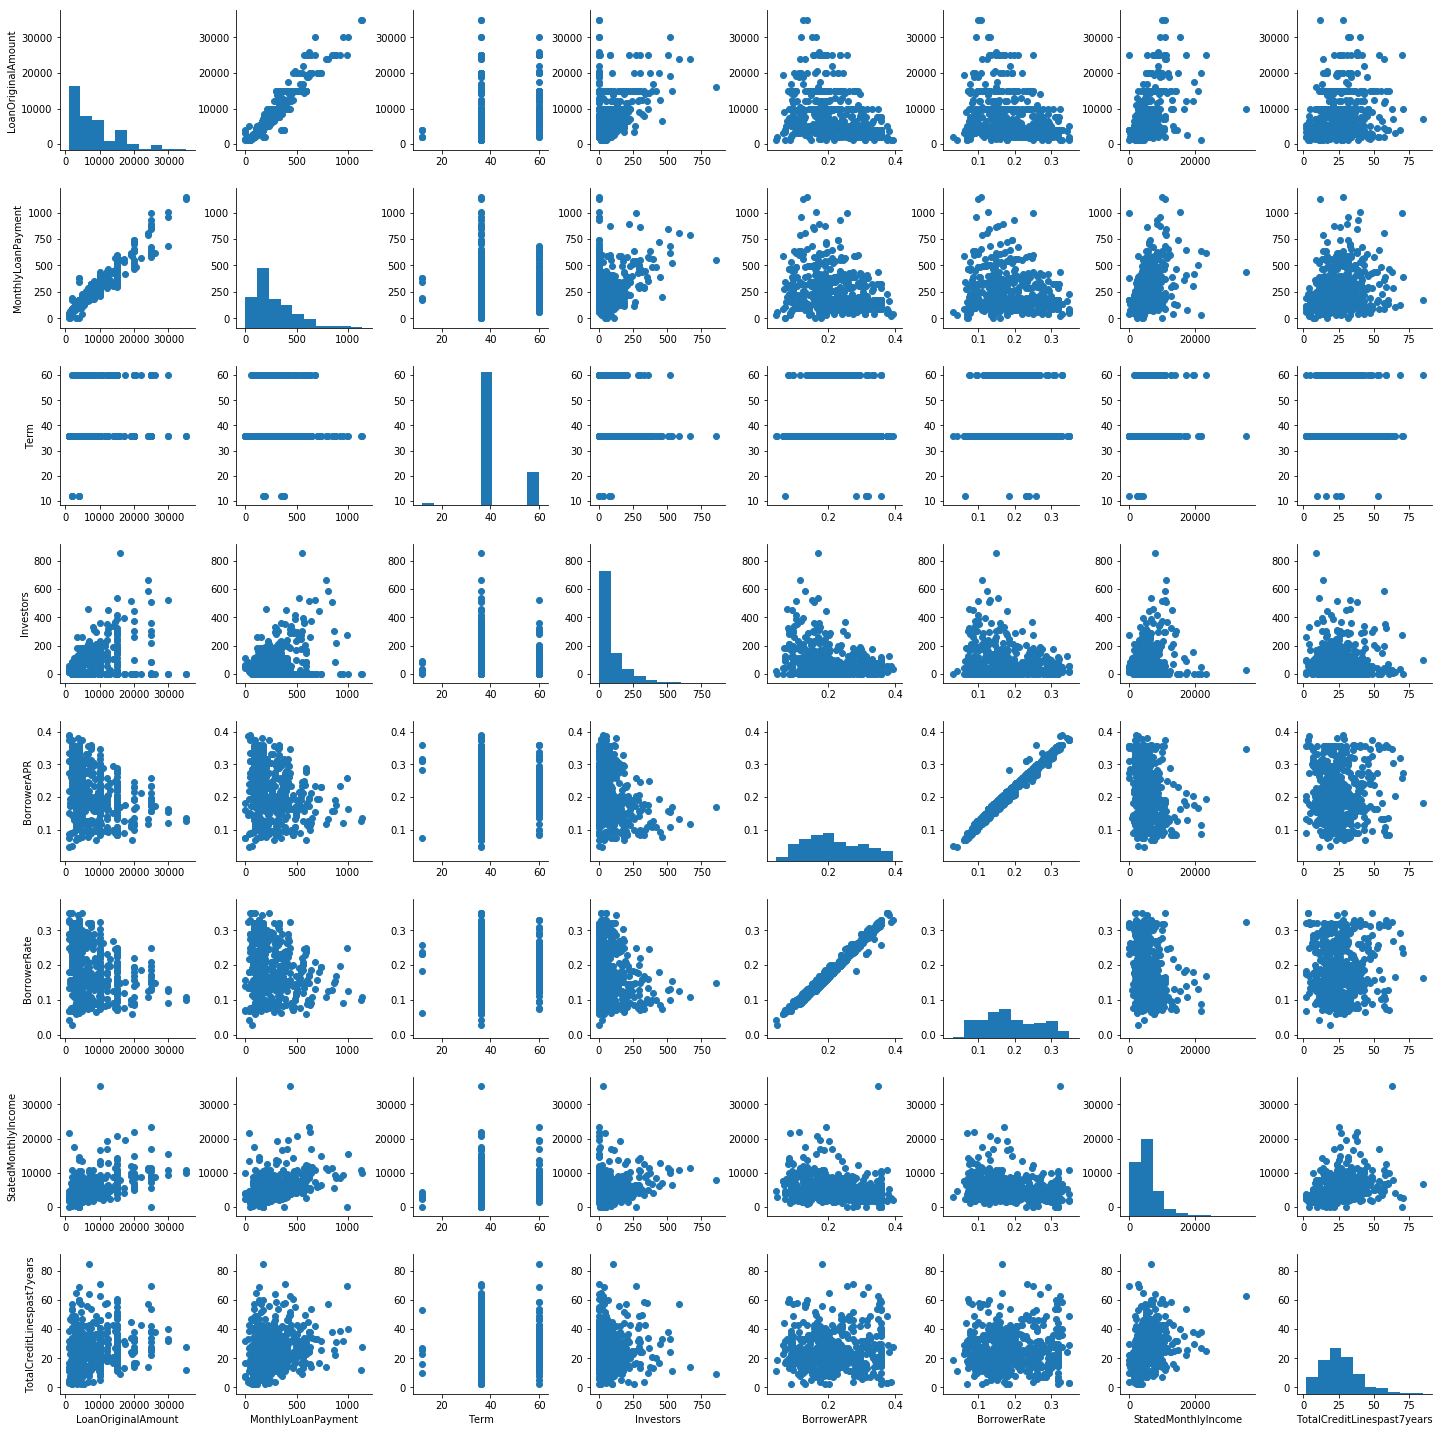

In [39]:
# Creating a plot matrix using sample data
cp_loan_data_sample = cp_loan_data.sample(n=500, replace=False)
graph = sb.PairGrid(data=cp_loan_data_sample, vars=numerical_features)
graph = graph.map_diag(plt.hist)
graph.map_offdiag(plt.scatter);

> We have a strong positive correlation coefficient between LoanOriginalAmount and MonthlyLoanPayment as expected, we also have a low correlation coefficient between Term and LoanOriginalAmount which is unexpected as you would expect the correlation coefficient would be higher but other factors may play a role in determining the term as LoanOriginalAmount is not the only value used to predict the Term. Hence from this the other factors must certainly play a larger role.

> The correlation coefficient between BorrowerAPR and BorrowerRate is high as expected an increase in the BorrowerRate will lead to an increase in the BorrowerAPR.

> As expected the correlation coefficient between LoanOriginalAmount and the the following variables Investors, BorrowerAPR, BorrowerRate, StatedMonthlyIncome and TotalCreditLinespast7yeas is low.

> Also the following variables TotalCreditLinespast7years, StatedMonthlyIncome, Investors and Term do not have a strong correlations with any other numerical variables. Hence I won't perform further analyses to investigate the relationship between these variables with other numerical variables.

#### Exploring the relationship between Loan Amount and Monthly Loan Payment

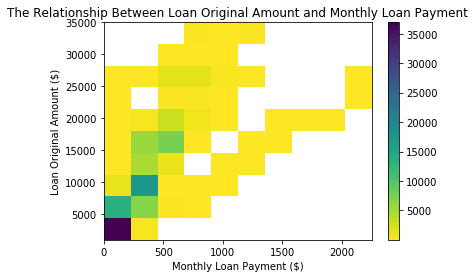

In [40]:
# Creating a scatterplot to explore the relationship that exists between Loan Amount and Monthly Loan Payment
plt.hist2d(data = cp_loan_data, y='LoanOriginalAmount', x='MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('The Relationship Between Loan Original Amount and Monthly Loan Payment');

As expected this plot suggests we have a linear relationship between Loan Original Amount and the Monthly loan payment 

#### Exploring the relationship between the Term and Loan Amount

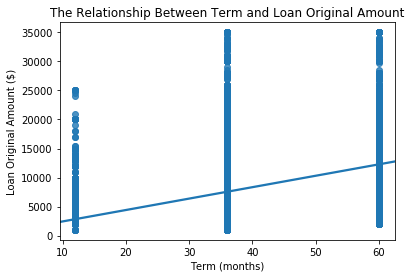

In [41]:
# Creating a scatterplot to explore the relationship that exists between Term and LoanOriginalAmount
sb.regplot(data= cp_loan_data, y='LoanOriginalAmount', x='Term')
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Term (months)')
correlation = cp_loan_data['LoanOriginalAmount'].corr(cp_loan_data['Term'])
plt.title('The Relationship Between Term and Loan Original Amount');

From the graph above we can see we have a weak positive correlation between the Term in months and the Loan Original Amount as earlier suggested.

#### Exploring the relationship between the categorical variables

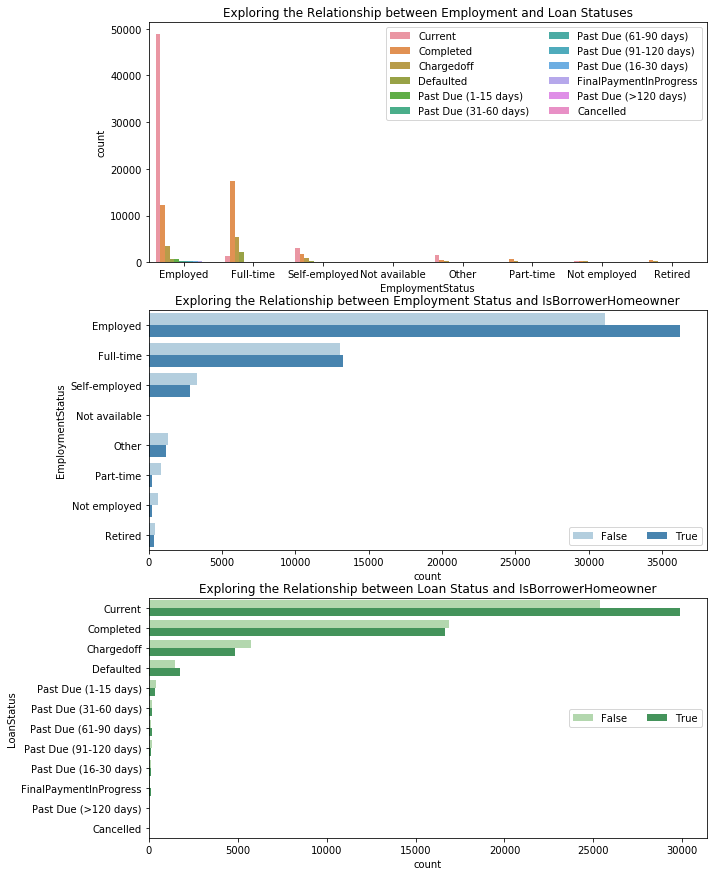

In [42]:
# Plotting 3 subplots of the categorical variables
plt.figure(figsize = [10, 15])

ax = plt.subplot(3, 1, 1)
sb.countplot(data=cp_loan_data, x='EmploymentStatus', hue='LoanStatus', orient='v')
ax.legend(loc = 1, ncol = 2)
plt.title('Exploring the Relationship between Employment and Loan Statuses')

ax = plt.subplot(3, 1, 2)
sb.countplot(data=cp_loan_data, y='EmploymentStatus', hue='IsBorrowerHomeowner', palette='Blues')
ax.legend(ncol = 2)
plt.title('Exploring the Relationship between Employment Status and IsBorrowerHomeowner')

ax = plt.subplot(3, 1, 3)
sb.countplot(data=cp_loan_data, y='LoanStatus', hue='IsBorrowerHomeowner', palette='Greens')
ax.legend(ncol = 2)
plt.title('Exploring the Relationship between Loan Status and IsBorrowerHomeowner');

From the EmploymentStatus vs LoanStatus individuals who are employed have the highest current loanStatus while the full-time and self-employed follow with full-time having the highest completed loanStatus. A further look at EmploymentStatus vs LoanStatus will be necessary in the multivariate section.

From the EmploymentStatus vs IsBorrowerHomeowner a large number of individuals who are houseowners are employed and have full-time employmentStatus while individuals who are self-employed, other, part-time, Not employed and retired have a large number of individuals who are not homeowners.

It looks like the current LoanStatus has the highest number of individuals who are homeowners, while the chargedoff and completed loanStatus have the highest number of individuals who are homeowners.



#### Exploring how BorrowerAPR and BorrowerRate correlate with categorical variables

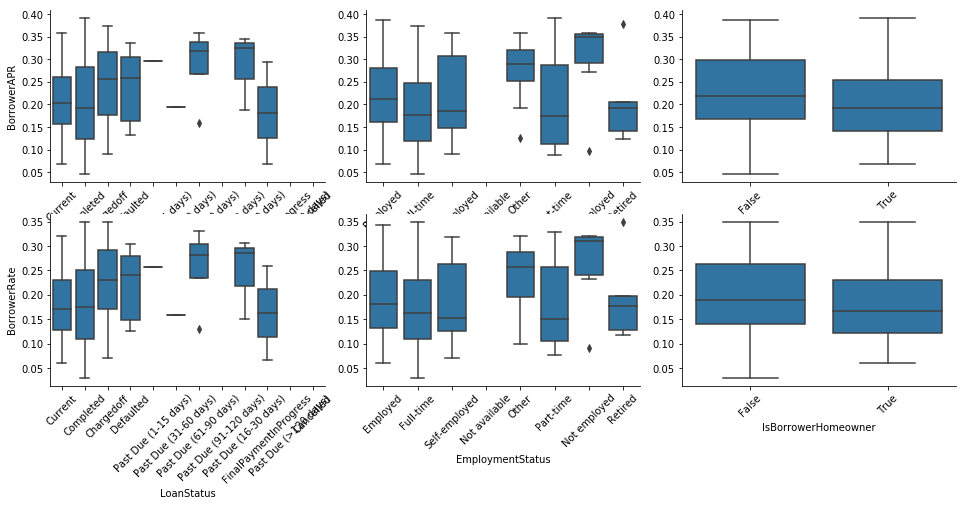

In [43]:
# Creating boxplots 

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    ax = sb.boxplot(x=x, y=y, color=default_color)
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = cp_loan_data_sample, y_vars = ['BorrowerAPR', 'BorrowerRate'], x_vars = categorical_features,
                 size = 3, aspect = 1.5)
g.map(boxgrid);

As expected the chargedoff and Defaulted loanStatus has both high BorrowerAPR and BorrowerRate. The LoanStatus with the highest BorrowerRate and BorrowerAPR is the Past Due(91 -120 days).

Interestingly Individuals who are not houseowners have a high BorrowerRate and BorrowerAPR which is unexpected. 
The 'other' EmploymentStatus has higher BorrowerRate and BorrowerAPR compared to the other EmploymentStatus

#### Exploring in depth the relationship between BorrowerAPR and BorrowerRate for all the data

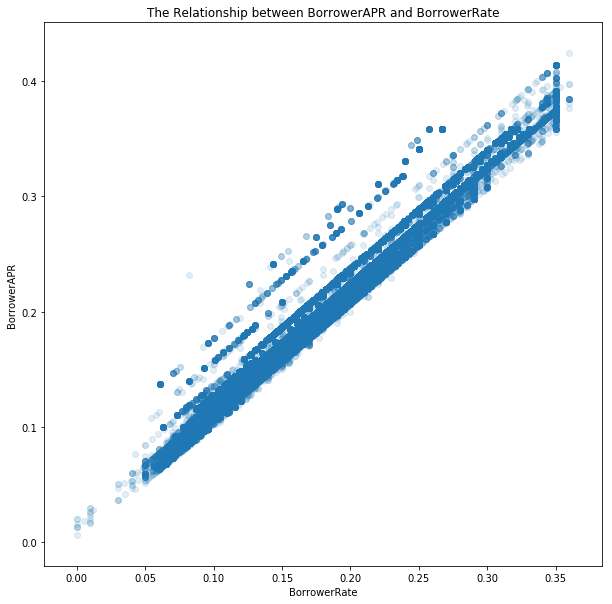

In [44]:
# creating a scatterplot for the BorrowerAPR vs BorrowerRate
plt.figure(figsize=[10, 10])
plt.scatter(data=cp_loan_data, x='BorrowerRate', y='BorrowerAPR', alpha=1/8)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.title('The Relationship between BorrowerAPR and BorrowerRate');

This plot indicates we have a linear relationship between BorrowerRate and BorrowerAPR. At the BorrowerRate of 0.35 we seem to have a threshold, where an increase in BorrowerAPR does not have an increase in BorrowerRate.

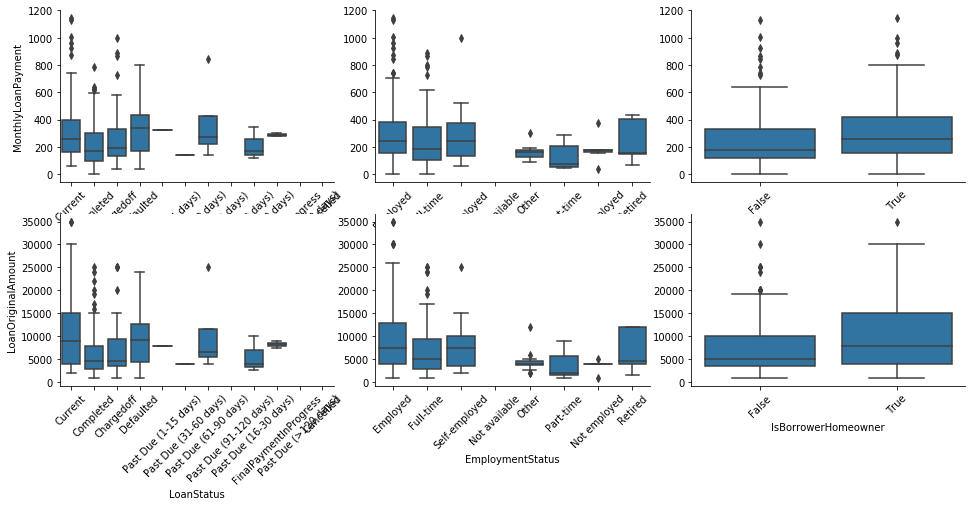

In [45]:
#Creating boxplots
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    ax = sb.boxplot(x=x, y=y, color=default_color)
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = cp_loan_data_sample, y_vars = ['MonthlyLoanPayment', 'LoanOriginalAmount'], x_vars = categorical_features,
                 size = 3, aspect = 1.5)
g.map(boxgrid);

As expected individuals who are not houseowners(False) have low LoanOriginalAmount and MonthlyLoanPayment. Also individuals with Not employed EmploymentStatus have low LoanOriginalAmount and MonthlyLoanPayment

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected the Current LoanStatus had the highest number of individuals whose employmentStatus is Employed. Also the Full-time employmentStatus has the highest number of individuals with Current loanStatus interestingly Full-time individuals also have a high number of chargedoff loans.

> In the relationship between LoanStatus and IsBorrowerHomeowner, the Current LoanStatus has the highest number of individuals who are houseowners

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of of the relationships that was unexpected was the correlation between BorrowerRate and BorrowerAPR. Also the fact that individuals who are not houseowners had a high BorrowerRate and BorrowerAPR. In the Multivariate section I will explore how some of these features that relate to one another interact with the main variable LoanStatus.

## Multivariate Exploration

> The main area I want to investigate in this section is how the variables I discovered with a high coefficient correlation with one another relate to the LoanStatus variable

#### Exploring BorrowerAPR,  BorrowerRate 2 variables with strong positive correlation and the LoanStatus variables

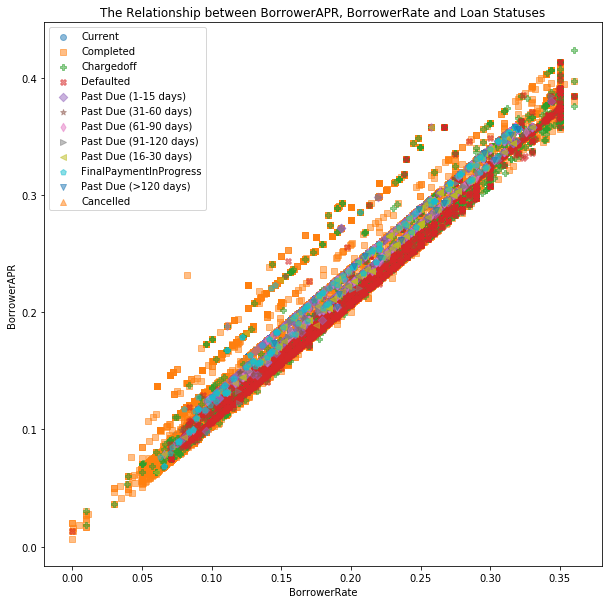

In [47]:
# Creating an encoded scatter plot

loan_encoding = [['Current', 'o'], ['Completed', 's'], ['Chargedoff', 'P'], ['Defaulted', 'X'], ['Past Due (1-15 days)', 'D'],
                ['Past Due (31-60 days)', '*'], ['Past Due (61-90 days)', 'd'], ['Past Due (91-120 days)', '>'], 
                 ['Past Due (16-30 days)', '<'], ['FinalPaymentInProgress', 'p'], ['Past Due (>120 days)', 'v'], ['Cancelled', '^']]

plt.figure(figsize=[10, 10])
for value, marker in loan_encoding:
    new_df = cp_loan_data[cp_loan_data['LoanStatus'] == value] 
    plt.scatter(data = new_df, x = 'BorrowerRate', y = 'BorrowerAPR', marker = marker, alpha=1/2)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.legend(['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)',
                                  'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)',
                                  'Cancelled'])
plt.title('The Relationship between BorrowerAPR, BorrowerRate and Loan Statuses');


We have a lot of overlapping data,  with reference to the bivariate scatter plot exploring the relationship between BorrowerAPR and BorrowerRate the relationship between the 2 variables is linear and in this multivariate plot the relationship is still linear and the categorical variable LoanStatus completed also follows the linear relationship that already exist indicating that the LoanStatus is affected by the BorrowerAPR and BorrowerRate.
Instead will explore 3 variables at a time in order to clearly see the relationship that exist

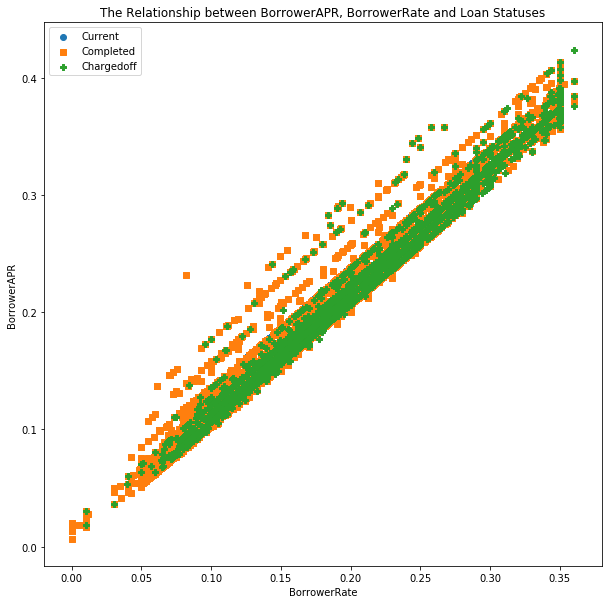

In [47]:
# Creating an encoded scatter plot

loan_encoding = [['Current', 'o'], ['Completed', 's'], ['Chargedoff', 'P'] ]

plt.figure(figsize=[10, 10])
for value, marker in loan_encoding:
    new_df = cp_loan_data[cp_loan_data['LoanStatus'] == value] 
    plt.scatter(data = new_df, x = 'BorrowerRate', y = 'BorrowerAPR', marker = marker)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.legend(['Current', 'Completed', 'Chargedoff'])
plt.title('The Relationship between BorrowerAPR, BorrowerRate and Loan Statuses');

The Current LoanStatus is covered by Completed LoanStatus which is seems to be dominant, from the graph we still see that BorrowerRate and BorrowerAPR have a positive correlation and the loanStatus is following that given trend. With this graph it indicates how the LoanStatus follows the BorrowerRate and BorrowerAPR

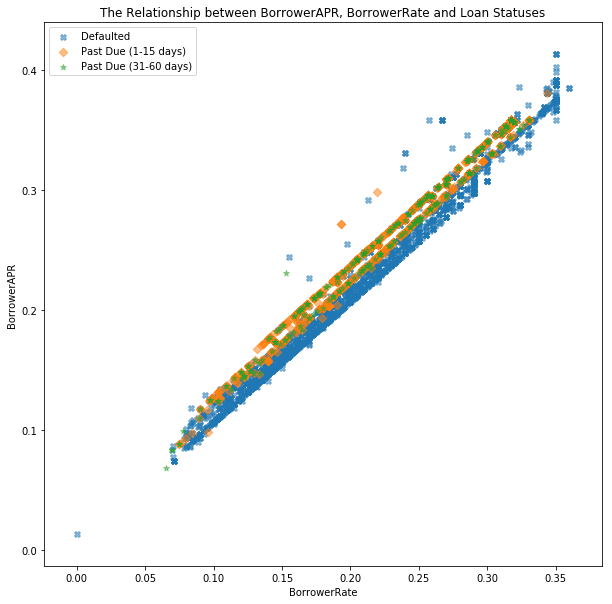

In [49]:
# Creating an encoded scatter plot

loan_encoding = [ ['Defaulted', 'X'], ['Past Due (1-15 days)', 'D'],
                ['Past Due (31-60 days)', '*']]

plt.figure(figsize=[10, 10])
for value, marker in loan_encoding:
    new_df = cp_loan_data[cp_loan_data['LoanStatus'] == value] 
    plt.scatter(data = new_df, x = 'BorrowerRate', y = 'BorrowerAPR', marker = marker, alpha=1/2)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.legend([ 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)'])
plt.title('The Relationship between BorrowerAPR, BorrowerRate and Loan Statuses');

Interestingly the defaulted, Past Due (1-15 days), and Past Due (31-60 days) LoanStatus starts above 0.05 BorrowerRate and immediately below 0.1 BorrowerAPR. also with these 3 variables we seem to have a threshold value on the BorrowerRate at o.35 where even with an increase in BorrowerAPR the BorrowerRate remains the same

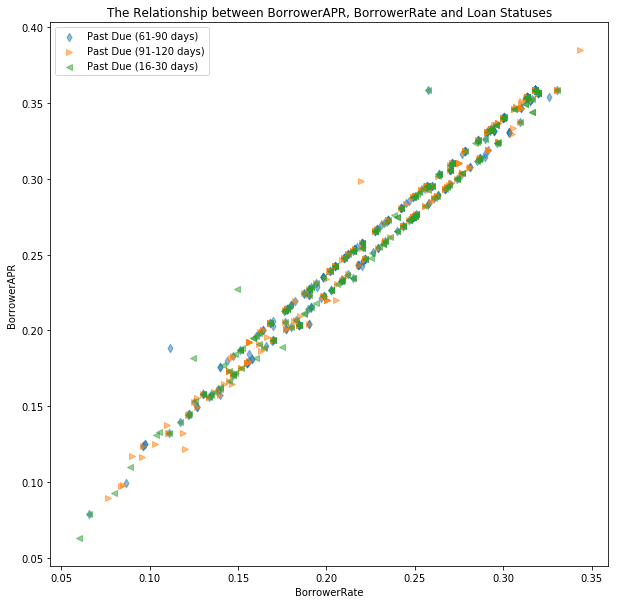

In [51]:
# Creating an encoded scatter plot

loan_encoding = [['Past Due (61-90 days)', 'd'], ['Past Due (91-120 days)', '>'], 
                 ['Past Due (16-30 days)', '<']]

plt.figure(figsize=[10, 10])
for value, marker in loan_encoding:
    new_df = cp_loan_data[cp_loan_data['LoanStatus'] == value] 
    plt.scatter(data = new_df, x = 'BorrowerRate', y = 'BorrowerAPR', marker = marker, alpha=1/2)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.legend(['Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)'])
plt.title('The Relationship between BorrowerAPR, BorrowerRate and Loan Statuses');

Interestingly the Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days) LoanStatus start past the 0.05 BorrowerRate mark which is different from the other Loanstatus Even the BorrowerAPR just immediately above 0.05. Otherwise the 3 variables follow the linear relationship that exists between BorrowerRate and BorrowerAPR

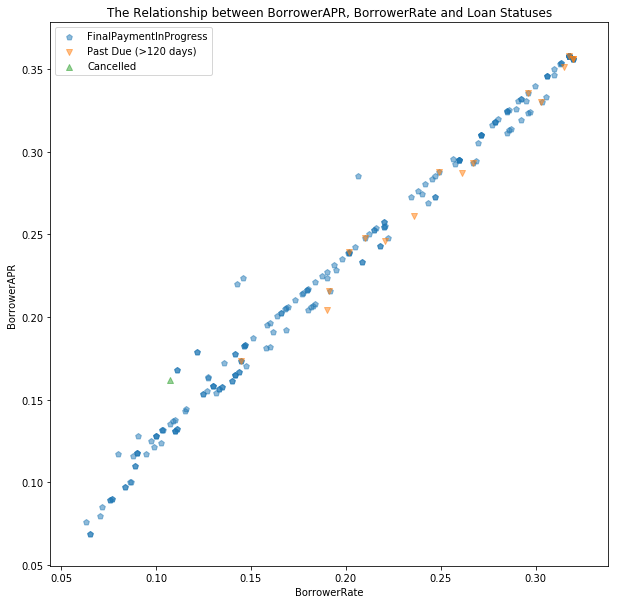

In [52]:
# Creating an encoded scatter plot

loan_encoding = [['FinalPaymentInProgress', 'p'], ['Past Due (>120 days)', 'v'], ['Cancelled', '^']]

plt.figure(figsize=[10, 10])
for value, marker in loan_encoding:
    new_df = cp_loan_data[cp_loan_data['LoanStatus'] == value] 
    plt.scatter(data = new_df, x = 'BorrowerRate', y = 'BorrowerAPR', marker = marker, alpha=1/2)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.legend([ 'FinalPaymentInProgress', 'Past Due (>120 days)','Cancelled'])
plt.title('The Relationship between BorrowerAPR, BorrowerRate and Loan Statuses');

The number of cancelled LoanStatus is very small interestingly LoanStatus start past the 0.05 BorrowerRate mark which is similar to the previous 3 variables above Even the BorrowerAPR just immediately above 0.05. 

One key thing that is similar across all the LoanStatus they follow the linear relationship that exist between BorrowerRate and BorrowerAPR where all the LoanStatus are present across the different BorrowerRate and BorrowerAPR values. 

The completed, chargedoff and current LoanStatus seem to have a threshold for the BorrowerRate where even with an increase in BorrowerAPR the BorrowerRate does not increase.

Interestingly the following LoanStatus defaulted, Past Due (1-15 days), and Past Due (31-60 days) start above 0.05 BorrowerRate and immediately below 0.1 BorrowerAPR.

#### Exploring the IsBorrowerHomeowner, LoanStatus and BorrowerAPR variables

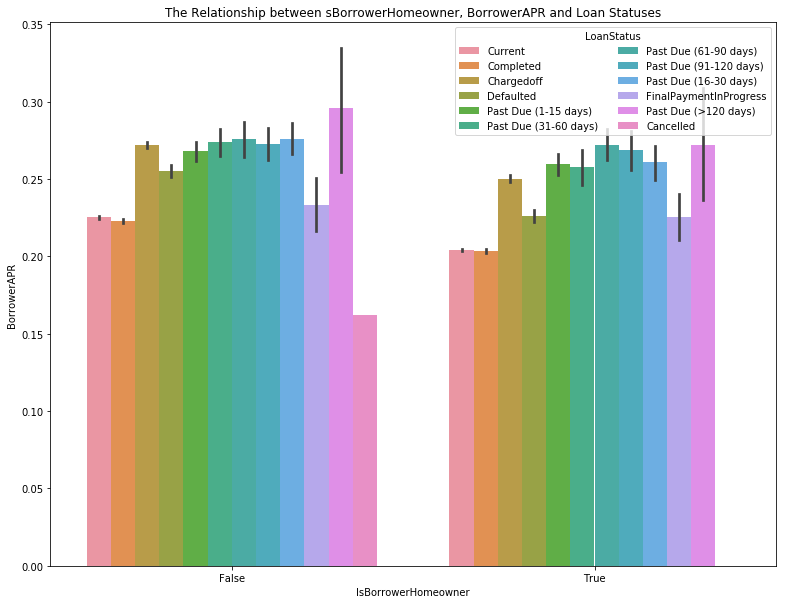

In [53]:
plt.figure(figsize=[13, 10])
ax = sb.barplot(data = cp_loan_data, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', hue = 'LoanStatus')
ax.legend(loc = 1, ncol= 2, title = 'LoanStatus')
plt.title('The Relationship between IsBorrowerHomeowner, BorrowerAPR and Loan Statuses');

As expected a high BorrowerAPR and an individual who is not a houseowner(False) have a LoanStatus as expected of Past Due (>120 Days) that is higher than the individuals who are houseowners. It seems individuals who are houseowners(True) do not have a cancelled LoanStatus. 

Interestingly most of the LoanStatus for individuals who are not houseowners(False) have a high BorrowerAPR which is expected but the Current and Completed LoanStatus for individuals who are not houseowners(False) to have a higher BorrowerAPR than those with houses is unexpected.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between BorrowerAPR, IsBorrowerHomeowner and the LoanStatus is strengthened with the barplot where as expected the LoanStatus Past Due (>120 Days) Would have a higher BorrowerAPR for individuals who are not house owners(False) than individuals who are houseowners(True).

>As expected individuals who are Houseonwers(True) do not have a cancelled LoanStatus.

### Were there any interesting or surprising interactions between features?

> Interestingly the following LoanStatus defaulted, Past Due (1-15 days), and Past Due (31-60 days) start above 0.05 BorrowerRate and immediately below 0.1 BorrowerAPR. This was different with the other LoanStatuses

> Another interesting interaction is the Current and Completed LoanStatus for individuals who are not houseowners(False) have a higher BorrowerAPR than those with houses(True) is unexpected you would expect houseowners to have a higher BorrowerAPR.



## Conclusions
During the Exploration process most of the numerical variables had weak correlation coefficient and hence were not investigated further. Some unexpected relationships were also discovered
>The 'Current' LoanStatus has the highest number of loans. It also has the highest number of individuals whose EmploymentStatus is 'Employed'. While the 'Completed' LoanStatus has the highest number of individuals whose EmploymentStatus is 'Full-time'.

>Majority of the loans are taken by individuals who are Houseowners(True)

> Interestingly the Term variable has 3 specific values in which all the loans fall under. And the correlation coefficient between Term and LoanOriginalAmount is low which is unexpected.

>The following numerical variables have a strong positive correlation; MonthlyLoanPayment and LoanOriginalAmount, BorrowerAPR and BorrowerRate.

>As expected the 'chargedoff' LoanStatus has both high BorrowerAPR and BorrowerRate.

>Defaulted, Past-Due(1-15 Days) and Past-Due(31-60 Days) loans are not common when the BorrowerRate and BorrowerAPR is below 0.05
